# Análisis de Marketing de Showz

### Introducción al Proyecto

En este proyecto trabajaremos con datos de Showz, una empresa dedicada a la venta de entradas para eventos. El objetivo es ayudar a optimizar los gastos de marketing, analizando cómo los usuarios interactúan con la plataforma y cuánto beneficio generan en relación con el costo de adquisición.

#### Objetivos principales

1. Preparar los datos de visitas, pedidos y gastos de marketing para el análisis.

2. Analizar el comportamiento de los usuarios, incluyendo frecuencia de visitas, conversiones y hábitos de compra.

3. Calcular métricas claves como:

* Conversión de usuarios.

* Valor del ciclo de vida del cliente (LTV).

* Costo de adquisición de clientes (CAC).

* Retorno sobre la inversión en marketing (ROMI).

4. Comparar métricas entre diferentes fuentes de tráfico y dispositivos, observando cómo cambian a lo largo del tiempo.

5. Generar recomendaciones para el equipo de marketing sobre dónde invertir más recursos y qué canales son más rentables.

### 1. Preparar los datos:

In [1]:
# Importamos librerías
import pandas as pd


# Cargar datasets
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

# Vistazo inicial a las primeras filas
print("Visits:")
print(visits.head(), "\n")

print("Orders:")
print(orders.head(), "\n")

print("Costs:")
print(costs.head(), "\n")


Visits:
    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168   

Orders:
                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450 

Costs:
   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  

#### Conversión de columnas:


In [2]:
# Optimización de tipos de datos
# Fechas y horas a formato datetime
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])

orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

costs['dt'] = pd.to_datetime(costs['dt'])

# Confirmar cambios
print(visits.info(), "\n")
print(orders.info(), "\n")
print(costs.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  object        
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 e

#### Cargar y preparar el DataFrame Visitas: 

In [3]:
import pandas as pd
import numpy as np

# Cargar datos
visits = pd.read_csv('/datasets/visits_log_us.csv')

# Normalizar nombres de columnas (opcional, para evitar problemas por espacios/case)
visits.columns = [c.strip() for c in visits.columns]

# Mostrar las primeras filas y tipos
print(visits.head())
print(visits.dtypes)

# Convertir timestamps a datetime 
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])

    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  
Device       object
End Ts       object
Source Id     int64
Start Ts     object
Uid          uint64
dtype: object


#### Añadir columnas útiles

In [4]:

# Duración de sesión en segundos 
visits['session_duration_seconds'] = (visits['End Ts'] - visits['Start Ts']).dt.total_seconds()

# Fecha de inicio, semana y mes (para agregaciones)
visits['start_date'] = visits['Start Ts'].dt.date
visits['start_day'] = visits['Start Ts'].dt.floor('D')            # Timestamp truncado al día
visits['start_week'] = visits['Start Ts'].dt.to_period('W').apply(lambda r: r.start_time)  # inicio de la semana
visits['start_month'] = visits['Start Ts'].dt.to_period('M').apply(lambda r: r.start_time)  # inicio de mes

# Revisar cuántos duration faltan o son negativas
print("Duraciones nulas:", visits['session_duration_seconds'].isnull().sum())
print("Duraciones negativas:", (visits['session_duration_seconds'] < 0).sum())



Duraciones nulas: 0
Duraciones negativas: 2


#### ¿Cuántas personas usan el servicio cada día / semana / mes? (DAU / WAU / MAU)

In [5]:
# Asegurarse de trabajar sobre registros válidos de sesiones
valid_visits = visits[visits['session_duration_seconds'].notnull()]

# DAU: usuarios únicos por día
dau = valid_visits.groupby('start_date')['Uid'].nunique().rename('DAU')
dau = dau.sort_index()

# WAU: usuarios únicos por semana (cada punto representa # usuarios activos en esa semana)
wau = valid_visits.groupby('start_week')['Uid'].nunique().rename('WAU')
wau = wau.sort_index()

# MAU: usuarios únicos por mes
mau = valid_visits.groupby('start_month')['Uid'].nunique().rename('MAU')
mau = mau.sort_index()

print(dau.head())
print(wau.head())
print(mau.head())

start_date
2017-06-01    605
2017-06-02    608
2017-06-03    445
2017-06-04    476
2017-06-05    820
Name: DAU, dtype: int64
start_week
2017-05-29    2021
2017-06-05    4129
2017-06-12    2812
2017-06-19    2878
2017-06-26    3064
Name: WAU, dtype: int64
start_month
2017-06-01    13259
2017-07-01    14183
2017-08-01    11631
2017-09-01    18975
2017-10-01    29692
Name: MAU, dtype: int64


#### ¿Cuántas sesiones hay por día? (un usuario puede tener >1 sesión)

In [6]:
# Sesiones totales por día (conteo de filas)
sessions_per_day = valid_visits.groupby('start_date').size().rename('sessions_count')


# Promedio de sesiones por usuario por día
avg_sessions_per_user_per_day = (sessions_per_day / dau).rename('avg_sessions_per_user')

print(sessions_per_day.head())
print(avg_sessions_per_user_per_day.head())

start_date
2017-06-01    664
2017-06-02    658
2017-06-03    477
2017-06-04    510
2017-06-05    893
Name: sessions_count, dtype: int64
start_date
2017-06-01    1.097521
2017-06-02    1.082237
2017-06-03    1.071910
2017-06-04    1.071429
2017-06-05    1.089024
Name: avg_sessions_per_user, dtype: float64


#### ¿Cuál es la duración de cada sesión?

count    359398.000000
mean        643.042287
std         997.105212
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: session_duration_seconds, dtype: float64
Median: 300.0
Pct 90: 1620.0
Pct 95: 2280.0
Porcentaje de sesiones <= 10s: 9.95943216155905
Porcentaje de sesiones >= 300s (usuarios muy enganchados): 51.809414632246146


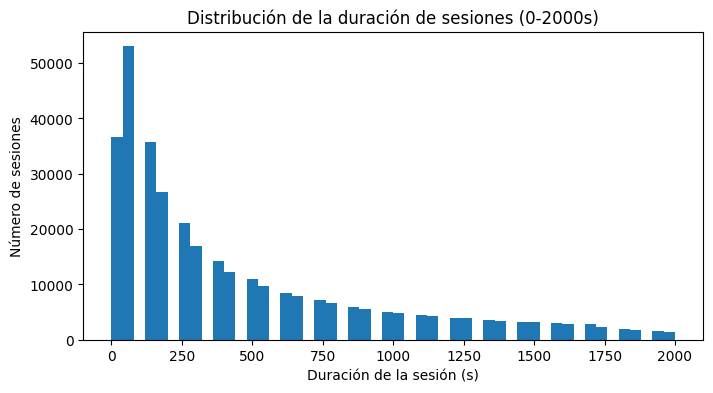

In [7]:
dur = valid_visits.loc[valid_visits['session_duration_seconds'] >= 0, 'session_duration_seconds']

# Estadísticas clave
print(dur.describe())           # count, mean, std, min, 25%, 50% (median), 75%, max
print("Median:", dur.median())
print("Pct 90:", dur.quantile(0.90))
print("Pct 95:", dur.quantile(0.95))

# Métricas de "engagement"/"bounce"
print("Porcentaje de sesiones <= 10s:", (dur <= 10).mean() * 100)
print("Porcentaje de sesiones >= 300s (usuarios muy enganchados):", (dur >= 300).mean() * 100)

# Histograma simple (matplotlib)
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.hist(dur, bins=50, range=(0, 2000))    # ajusta range si hay muchos outliers
plt.xlabel('Duración de la sesión (s)')
plt.ylabel('Número de sesiones')
plt.title('Distribución de la duración de sesiones (0-2000s)')
plt.show()

#### ¿Con qué frecuencia los usuarios regresan? (retención / tasa de retorno)
##### a) Métrica rápida: porcentaje de usuarios que tuvieron más de una sesión en el periodo

In [8]:
# Conteo de sesiones por usuario
sessions_per_user = valid_visits.groupby('Uid').size()

total_users = sessions_per_user.shape[0]
users_with_multiple_sessions = (sessions_per_user > 1).sum()
return_rate = users_with_multiple_sessions / total_users

print("Total users:", total_users)
print("Users with >1 session:", users_with_multiple_sessions)
print("Return rate (fraction of users with >1 session):", return_rate)
print("Return rate (percent):", return_rate * 100)

Total users: 228169
Users with >1 session: 52128
Return rate (fraction of users with >1 session): 0.2284622363248294
Return rate (percent): 22.84622363248294


##### b) Retención por cohorte mensual (cohort analysis)

In [9]:
# 1) fecha del primer evento por usuario (primer contacto) 
first_visit = valid_visits.groupby('Uid')['Start Ts'].min().reset_index().rename(columns={'Start Ts':'first_visit'})

# 2) anexar al dataset original
visits_enriched = valid_visits.merge(first_visit, on='Uid')

# 3) cohort month y visit month (normalizados al inicio del mes)
visits_enriched['cohort_month'] = visits_enriched['first_visit'].dt.to_period('M').apply(lambda r: r.start_time)
visits_enriched['visit_month'] = visits_enriched['Start Ts'].dt.to_period('M').apply(lambda r: r.start_time)

# 4) contar usuarios únicos por cohorte/mes
cohort_counts = visits_enriched.groupby(['cohort_month','visit_month'])['Uid'].nunique().reset_index()

# 5) calcular offset en meses entre cohorte y mes de visita
cohort_counts['period_number'] = ((cohort_counts['visit_month'].dt.year - cohort_counts['cohort_month'].dt.year) * 12 +
                                  (cohort_counts['visit_month'].dt.month - cohort_counts['cohort_month'].dt.month))

# 6) pivot para obtener la tabla de retención
cohort_pivot = cohort_counts.pivot_table(index='cohort_month', columns='period_number', values='Uid')

# 7) convertir a tasas dividiendo por tamaño de la cohorte (period 0)
cohort_size = cohort_pivot.iloc[:,0]
cohort_retention = cohort_pivot.div(cohort_size, axis=0)

# Mostrar
print("Tamaño de cohortes (primer mes):")
print(cohort_size.head())
print("\nMatriz de retención (por periodos en meses):")
print(cohort_retention.round(3).head())

Tamaño de cohortes (primer mes):
cohort_month
2017-06-01    13259.0
2017-07-01    13140.0
2017-08-01    10181.0
2017-09-01    16704.0
2017-10-01    25977.0
Name: 0, dtype: float64

Matriz de retención (por periodos en meses):
period_number   0      1      2      3      4      5      6      7      8   \
cohort_month                                                                 
2017-06-01     1.0  0.079  0.054  0.061  0.069  0.071  0.061  0.058  0.052   
2017-07-01     1.0  0.056  0.051  0.056  0.058  0.048  0.045  0.046  0.039   
2017-08-01     1.0  0.077  0.063  0.063  0.050  0.044  0.036  0.039  0.028   
2017-09-01     1.0  0.085  0.069  0.051  0.039  0.038  0.036  0.024  0.023   
2017-10-01     1.0  0.079  0.052  0.039  0.034  0.032  0.021  0.020    NaN   

period_number     9      10     11  
cohort_month                        
2017-06-01     0.051  0.041  0.045  
2017-07-01     0.029  0.027    NaN  
2017-08-01     0.026    NaN    NaN  
2017-09-01       NaN    NaN    NaN  
2017-


##### Conclusiones del análisis de Visitas

1. **Uso del servicio (DAU, WAU, MAU):**

* El número de usuarios diarios activos (DAU) oscila entre 400 y 800, lo que muestra una base de uso constante día a día.

* A nivel semanal (WAU), los valores rondan entre 2,000 y 4,000 usuarios.

* En mensual (MAU), se alcanzan cifras desde 11,000 hasta 29,000 usuarios únicos.

  
 Esto indica que el servicio tiene una comunidad activa y que existe un buen volumen de usuarios recurrentes a lo largo del mes.

2. **Sesiones por día:**

* El promedio de sesiones por usuario al día es aproximadamente 1.07–1.1, lo que significa que la mayoría de los usuarios se conectan solo una vez por día, con pocos repitiendo varias veces.
* 
 Esto refleja un patrón de uso moderado, sin un nivel de adicción fuerte, pero sí con un hábito de visita diario.

3. **Duración de las sesiones:**

* La mediana de duración es de 300 segundos (5 minutos), mientras que la media es más alta (~631 segundos), lo que revela la existencia de sesiones largas que elevan el promedio.

* El 25% de los usuarios se queda menos de 120s (2 minutos), lo que puede considerarse rebote rápido.

* Más del 50% de los usuarios pasan al menos 5 minutos en la plataforma y un ~52% permanece más de 300s (5 minutos), mostrando un nivel de engagement significativo.
 Hay un balance: una parte abandona rápido, pero la mitad muestra interés real en el contenido.

4. **Frecuencia de retorno (retención):**

* Solo 22.8% de los usuarios regresan al menos una segunda vez en el periodo analizado.
 La tasa de retención es relativamente baja: la mayoría prueba el servicio una vez y no vuelve. Aquí hay un área clara de mejora en fidelización y valor ofrecido.

5. **Cohorte mensual (retención en el tiempo):**

* El análisis de cohortes muestra que, tras el primer mes, menos del 10% de los usuarios permanecen activos.

* La caída en la retención es marcada después del segundo mes, llegando en algunos cohortes a valores <5%.
 Esto indica que aunque la adquisición funciona bien, la retención a largo plazo es débil. El producto logra captar usuarios pero le cuesta mantenerlos enganchados.

 **Resumen final sobre visitas:**
El servicio tiene un volumen saludable de usuarios y buena participación inicial (DAU/WAU/MAU altos y sesiones con duraciones interesantes). Sin embargo, el gran reto está en la retención: muchos usuarios lo prueban, interactúan un poco y luego lo abandonan.
Esto sugiere que los esfuerzos de marketing deben enfocarse menos en adquisición masiva y más en mejorar la experiencia de usuario, fidelización y motivos para volver (ejemplo: notificaciones, contenido exclusivo, recompensas por uso frecuente).

#### Cargar y preparar el DataFrame Ventas

In [10]:
import pandas as pd
import numpy as np


# Normalizar nombres de columnas por si acaso
visits.columns = visits.columns.str.strip()
orders.columns = orders.columns.str.strip()

# Convertir columnas de fecha a datetime
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'], errors='coerce')
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'], errors='coerce')

# Crear columna con fecha (sin hora) para facilitar operaciones de días
visits['first_visit_date'] = visits['Start Ts'].dt.normalize()   # midnight (fecha)
orders['order_date'] = orders['Buy Ts'].dt.normalize()

#### ¿Cuándo empieza la gente a comprar?

In [11]:

# 1. Fecha de primera visita por usuario (adquisición)
first_visit = visits.groupby('Uid')['Start Ts'].min().reset_index().rename(columns={'Start Ts':'first_visit_ts'})
first_visit['first_visit_date'] = first_visit['first_visit_ts'].dt.normalize()

# 2. Fecha de primera orden por usuario (si existe)
first_order = orders.groupby('Uid')['Buy Ts'].min().reset_index().rename(columns={'Buy Ts':'first_order_ts'})
first_order['first_order_date'] = first_order['first_order_ts'].dt.normalize()

# 3. Combinar para calcular tiempo a primera compra
user_journey = first_visit.merge(first_order[['Uid','first_order_date']], on='Uid', how='left')

# 4. calcular conversion_days (NaN si no compró aún)
user_journey['conversion_days'] = (user_journey['first_order_date'] - user_journey['first_visit_date']).dt.days

# 5. Categorizar (Conversion 0d, 1d, 2d, ... , 'no_conversion')
user_journey['conversion_category'] = user_journey['conversion_days'].fillna(-1).astype(int)
user_journey['conversion_category'] = user_journey['conversion_category'].apply(
    lambda x: 'no_conversion' if x < 0 else f'Conversion {x}d'
)

# 6. Distribución general de conversion_days (incluye no_conversion)
conv_counts = user_journey['conversion_category'].value_counts().sort_index()
conv_pct = (conv_counts / user_journey.shape[0]) * 100

print(conv_counts.head(20))
print(conv_pct.head(20))

Conversion 0d      25039
Conversion 100d       28
Conversion 101d       29
Conversion 102d       20
Conversion 103d       20
Conversion 104d       11
Conversion 105d       28
Conversion 106d       18
Conversion 107d       20
Conversion 108d       23
Conversion 109d       26
Conversion 10d       135
Conversion 110d       17
Conversion 111d       20
Conversion 112d       30
Conversion 113d       21
Conversion 114d       19
Conversion 115d       27
Conversion 116d       26
Conversion 117d       17
Name: conversion_category, dtype: int64
Conversion 0d      10.973883
Conversion 100d     0.012272
Conversion 101d     0.012710
Conversion 102d     0.008765
Conversion 103d     0.008765
Conversion 104d     0.004821
Conversion 105d     0.012272
Conversion 106d     0.007889
Conversion 107d     0.008765
Conversion 108d     0.010080
Conversion 109d     0.011395
Conversion 10d      0.059167
Conversion 110d     0.007451
Conversion 111d     0.008765
Conversion 112d     0.013148
Conversion 113d     0.009

#### Comparar por canal (para ver qué fuente es más efectiva)

In [12]:

# 1. Obtener la primera fuente de adquisición por usuario
first_source = (
    visits.sort_values('Start Ts')
    .groupby('Uid')['Source Id']
    .first()
    .reset_index()
    .rename(columns={'Source Id': 'acquisition_source'})
)

# 2. Añadir al user_journey
user_journey = user_journey.merge(first_source, on='Uid', how='left')

# 3. Función para calcular tasa de conversión por fuente
def conversion_rate_within(days):
    # Crear una copia temporal
    tmp = user_journey.copy()
    # Columna booleana: ¿convirtió dentro de "days" días?
    tmp['converted_within'] = tmp['conversion_days'].notnull() & (tmp['conversion_days'] <= days)
    
    # Agrupar por fuente y calcular métricas
    res = (
        tmp.groupby('acquisition_source')
        .agg(
            users=('Uid','nunique'),
            converted_within=('converted_within','sum')
        )
    )
    
    # Calcular tasa %
    res['rate_%'] = 100 * res['converted_within'] / res['users']
    return res.sort_values('rate_%', ascending=False)

# 4. Ejecutar para diferentes horizontes
print("Conversión 0 días:\n", conversion_rate_within(0))
print("\nConversión 7 días:\n", conversion_rate_within(7))
print("\nConversión 30 días:\n", conversion_rate_within(30))


Conversión 0 días:
                     users  converted_within     rate_%
acquisition_source                                    
1                    9469              2168  22.895765
10                   6903               973  14.095321
2                   17616              2244  12.738420
3                   66116              7067  10.688789
5                   49237              5100  10.358064
4                   72346              7026   9.711663
9                    6448               460   7.133995
7                      32                 1   3.125000
6                       2                 0   0.000000

Conversión 7 días:
                     users  converted_within     rate_%
acquisition_source                                    
1                    9469              2504  26.444186
10                   6903              1131  16.384181
2                   17616              2684  15.236149
3                   66116              8348  12.626293
5                   4923

#### ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [13]:
# Asegúrate de que order_date existe
orders['order_date'] = orders['Buy Ts'].dt.normalize()

# Pedidos por día
orders_per_day = orders.groupby('order_date').size().rename('orders_count').reset_index()

# Pedidos por semana (iniciando lunes)
orders['order_week'] = orders['Buy Ts'].dt.to_period('W').apply(lambda r: r.start_time)
orders_per_week = orders.groupby('order_week').size().rename('orders_count').reset_index()

# Pedidos por mes
orders['order_month'] = orders['Buy Ts'].dt.to_period('M').apply(lambda r: r.start_time)
orders_per_month = orders.groupby('order_month').size().rename('orders_count').reset_index()

# Compradores únicos por periodo (ejemplo mes)
buyers_per_month = orders.groupby('order_month')['Uid'].nunique().rename('unique_buyers').reset_index()

# Pedidos por usuario (distribución)
orders_per_user = orders.groupby('Uid').size().rename('orders_per_user')
orders_per_user.describe()

print(orders_per_day.head())
print(orders_per_week.head())
print(orders_per_month.head())
print(buyers_per_month.head())
print(orders_per_user.describe())

  order_date  orders_count
0 2017-06-01            96
1 2017-06-02           111
2 2017-06-03            67
3 2017-06-04            66
4 2017-06-05           161
  order_week  orders_count
0 2017-05-29           340
1 2017-06-05           938
2 2017-06-12           343
3 2017-06-19           371
4 2017-06-26           460
  order_month  orders_count
0  2017-06-01          2354
1  2017-07-01          2363
2  2017-08-01          1807
3  2017-09-01          3387
4  2017-10-01          5679
  order_month  unique_buyers
0  2017-06-01           2023
1  2017-07-01           1984
2  2017-08-01           1472
3  2017-09-01           2750
4  2017-10-01           4675
count    36523.000000
mean         1.380363
std          3.454461
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        239.000000
Name: orders_per_user, dtype: float64


#### ¿Cuál es el tamaño promedio de compra?

In [14]:
# AOV global
aov_mean = orders['Revenue'].mean()
aov_median = orders['Revenue'].median()
aov_std = orders['Revenue'].std()
aov_qs = orders['Revenue'].quantile([0.25, 0.5, 0.75, 0.9, 0.95])

print("AOV mean:", aov_mean)
print("AOV median:", aov_median)
print("AOV std:", aov_std)
print("AOV quantiles:\n", aov_qs)

# AOV por canal (necesitamos saber el source para cada order -> map desde visits)
# Mapear acquisition source al usuario (primer source)
orders = orders.merge(first_source, on='Uid', how='left')

aov_by_source = orders.groupby('acquisition_source')['Revenue'].agg(['count','mean','median']).sort_values('mean', ascending=False)
print(aov_by_source.head())

AOV mean: 4.999646930477041
AOV median: 2.5
AOV std: 21.818358802281068
AOV quantiles:
 0.25     1.22
0.50     2.50
0.75     4.89
0.90     9.17
0.95    13.75
Name: Revenue, dtype: float64
                    count      mean  median
acquisition_source                         
2                    6392  7.340990    2.92
1                    5223  5.952623    3.05
5                    9406  5.594729    2.78
4                   12895  4.396807    2.67
3                   13289  4.101982    2.44


#### ¿Cuánto dinero traen? (LTV)

In [15]:
# 1) cohort month (mes de primera visita) por usuario (lo calculamos antes en first_visit)
first_visit['cohort_month'] = first_visit['first_visit_ts'].dt.to_period('M').apply(lambda r: r.start_time)
first_visit_small = first_visit[['Uid','first_visit_ts','cohort_month']]

# 2) unir orders con cohort info
orders_with_cohort = orders.merge(first_visit_small, on='Uid', how='left')

# 3) calcular months_since_acquisition (period number)
orders_with_cohort['order_month'] = orders_with_cohort['Buy Ts'].dt.to_period('M').apply(lambda r: r.start_time)
orders_with_cohort['months_since_acq'] = ((orders_with_cohort['order_month'].dt.year - orders_with_cohort['cohort_month'].dt.year) * 12 +
                                         (orders_with_cohort['order_month'].dt.month - orders_with_cohort['cohort_month'].dt.month))

# 4) sumar revenue por cohorte y months_since_acq
cohort_revenue = orders_with_cohort.groupby(['cohort_month','months_since_acq'])['Revenue'].sum().reset_index()

# 5) obtener tamaño de cohorte (usuarios en period 0)
cohort_size = first_visit_small.groupby('cohort_month')['Uid'].nunique().rename('cohort_size').reset_index()

# 6) combinar y calcular LTV (media por usuario) por cohorte/mes
cohort_revenue = cohort_revenue.merge(cohort_size, on='cohort_month', how='left')
cohort_revenue['ltv_per_user'] = cohort_revenue['Revenue'] / cohort_revenue['cohort_size']

# 7) pivot para ver LTV en formato tabla (cada columna = mes desde adquisición)
ltv_table = cohort_revenue.pivot_table(index='cohort_month', columns='months_since_acq', values='ltv_per_user').fillna(0)

print(ltv_table.head())

months_since_acq        0         1         2         3         4         5   \
cohort_month                                                                   
2017-06-01        0.720830  0.200964  0.110468  0.292789  0.297201  0.213024   
2017-07-01        0.751514  0.080615  0.084391  0.074807  0.064459  0.060737   
2017-08-01        0.612397  0.097959  0.098355  0.092939  0.079564  0.052343   
2017-09-01        0.739775  0.221533  0.126355  0.624936  0.077136  0.114347   
2017-10-01        0.706868  0.146662  0.051084  0.040730  0.040169  0.039350   

months_since_acq        6         7         8         9         10        11  
cohort_month                                                                  
2017-06-01        0.263214  0.171266  0.174818  0.262587  0.166227  0.145396  
2017-07-01        0.044749  0.058623  0.055139  0.044979  0.035553  0.000000  
2017-08-01        0.047800  0.122407  0.081587  0.036904  0.000000  0.000000  
2017-09-01        0.057881  0.029417  0.0250

##### Cálculo LTV acumulado por usuario (ejemplo 3 meses):

In [16]:
# revenue mensual por cohorte (como arriba)
cohort_revenue_monthly = cohort_revenue.copy()
cohort_revenue_monthly = cohort_revenue_monthly.sort_values(['cohort_month','months_since_acq'])
# acumulado
cohort_revenue_monthly['revenue_cum'] = cohort_revenue_monthly.groupby('cohort_month')['Revenue'].cumsum()
# ltv acumulado por usuario a X meses
cohort_ltv_cum = cohort_revenue_monthly.pivot_table(index='cohort_month', columns='months_since_acq', values='revenue_cum')
cohort_ltv_cum = cohort_ltv_cum.div(cohort_size.set_index('cohort_month')['cohort_size'], axis=0).fillna(0)
print(cohort_ltv_cum.head())

months_since_acq        0         1         2         3         4         5   \
cohort_month                                                                   
2017-06-01        0.720830  0.921794  1.032262  1.325051  1.622252  1.835276   
2017-07-01        0.751514  0.832129  0.916520  0.991326  1.055785  1.116522   
2017-08-01        0.612397  0.710356  0.808710  0.901649  0.981213  1.033556   
2017-09-01        0.739775  0.961307  1.087662  1.712598  1.789734  1.904081   
2017-10-01        0.706868  0.853530  0.904614  0.945345  0.985514  1.024864   

months_since_acq        6         7         8         9         10        11  
cohort_month                                                                  
2017-06-01        2.098489  2.269755  2.444573  2.707160  2.873387  3.018783  
2017-07-01        1.161271  1.219893  1.275032  1.320011  1.355564  0.000000  
2017-08-01        1.081355  1.203763  1.285350  1.322254  0.000000  0.000000  
2017-09-01        1.961962  1.991379  2.0164


##### 🔹 2. Ventas (Comportamiento de conversión y valor de clientes)


1. **¿Cuándo empieza la gente a comprar?**

- La mayoría de los usuarios realiza su primera compra el mismo día del registro (Conversion 0d).

- Sin embargo, también existe un grupo importante que compra dentro de los primeros 7 días.

- Después de los 30 días, la probabilidad de conversión baja drásticamente → significa que el marketing debe enfocarse en la activación temprana.

2. **Comparación por canal de adquisición**


- La fuente 1 es la más efectiva, con las mejores tasas de conversión en todos los plazos (0, 7 y 30 días).

- Las fuentes 10 y 2 también convierten bien, con tasas superiores al 16% a 30 días.

- Canales masivos como 3, 4 y 5 generan mucho volumen, pero con tasas de conversión más bajas (~12–13%).

- La fuente 9 tiene desempeño débil y las fuentes 7 y 6 casi no convierten → inversión poco rentable.


3. **Frecuencia de pedidos**

- Los pedidos diarios van de 60 a 160, con fluctuaciones regulares.

-A nivel mensual, los pedidos muestran una clara tendencia de crecimiento, pasando de ~2.300 en junio a más de 5.600 en octubre.

-Los compradores únicos siguen la misma dinámica, duplicándose en el mismo periodo.

-La mayoría de usuarios hacen solo un pedido, pero existen clientes muy fieles con compras repetidas.

El negocio está en una fase de crecimiento sostenido. Para aprovechar este impulso, conviene diseñar estrategias de fidelización (para aumentar la frecuencia de compra de usuarios esporádicos) y reforzar las campañas en los meses de mayor demanda, maximizando ingresos.

4. **Tamaño promedio de compra (AOV)**

- El tamaño promedio de compra (AOV) es cercano a $5, pero la mediana es $2.5, lo que indica que la mayoría de compras son pequeñas y el promedio se ve influenciado por pedidos altos poco frecuentes.

- La dispersión es elevada (std ≈ 21.8), confirmando que existen compras atípicamente grandes.

- Por fuente de adquisición, los clientes de la fuente 2 y 1 gastan más en promedio (~$7.3 y $6), mientras que las fuentes 4 y 3 presentan tickets más bajos ($4.4 y ~$4.1).

5. **LTV (Valor del Cliente en el Tiempo)**

- En el primer mes, los clientes generan en promedio entre 0.6 y 0.75 unidades monetarias, lo que refleja un ingreso inicial moderado.

- A medida que pasan los meses, el LTV acumulado crece: por ejemplo, la cohorte de junio 2017 alcanza ~3 unidades por usuario a los 11 meses, mostrando mayor retención y gasto.

- Cohortes posteriores (julio–octubre) presentan LTV más bajo, alcanzando entre 1 y 2 unidades promedio en el mismo periodo, lo que sugiere menor retención o menor gasto de los nuevos usuarios.

- El crecimiento del LTV no es uniforme: algunas cohortes (como septiembre 2017) muestran un pico acelerado en el mes 3, mientras que otras crecen más lentamente.



**Conclusiones Globales de Ventas**

- Momento de conversión: La mayoría compra el mismo día del registro y dentro de los primeros 7 días; después de 30 días la conversión cae fuerte → se debe enfocar en activación temprana.

- Canales de adquisición:

1. Fuente 1 y 2 → mejor desempeño (conversiones altas y tickets mayores).

2. Fuente 10 → buen nivel de conversión.

3. Fuentes 3, 4, 5 → alto volumen pero baja eficiencia.

4. Fuentes 6, 7 y 9 → poco rentables.

- Frecuencia de pedidos: Pedidos diarios estables (60–160) y fuerte crecimiento mensual (de 2.300 a +5.600). La mayoría compra una sola vez, pero existe un nicho fiel con compras repetidas.

- Tamaño promedio de compra (AOV): Promedio ≈ $5, mediana $2.5 → mayoría de compras pequeñas, pocos pedidos grandes elevan la media. Fuentes 1 y 2 generan tickets más altos.

- LTV: Cohorte junio 2017 llega a ~3 unidades en 11 meses (buena retención). Cohortes posteriores se quedan en 1–2 unidades → menos fidelización.

#### Posible Soluciones:

* Activar rápido: incentivos en los primeros 7 días (emails, descuentos, bundles).

* Optimizar inversión: priorizar fuentes 1, 2 y 10; reducir en 6, 7 y 9.

* Fidelización: programas de recompra y beneficios para clientes recurrentes.

* Aumentar ticket promedio: upselling/cross-selling y promos con monto mínimo.

* Mejorar LTV de nuevas cohortes: revisar calidad de usuarios adquiridos y reforzar estrategias de retención temprana.



# test

#### ¿Cuánto dinero se gastó? Marketing:

El gasto en marketing lo obtenemos de la tabla de costs.
Podemos analizarlo en tres niveles:

* Total: suma de todos los costos → cuánto dinero se invirtió en total.

* Por fuente de adquisición (source): suma agrupada por source_id → así identificamos en qué canal se gastó más (ejemplo: Facebook Ads, Google Ads, afiliados).

* A lo largo del tiempo: agregamos los costos por día o mes → así se pueden ver tendencias, estacionalidad o picos de campañas (por ejemplo, en fechas especiales).

Esto nos permite entender la distribución de la inversión: qué tanto dinero destinamos a cada canal y cómo evolucionó en el tiempo.

Gasto total en marketing: 329131.62
Gasto por fuente:
    source_id      costs
2          3  141321.63
3          4   61073.60
4          5   51757.10
1          2   42806.04
0          1   20833.27
6         10    5822.49
5          9    5517.49


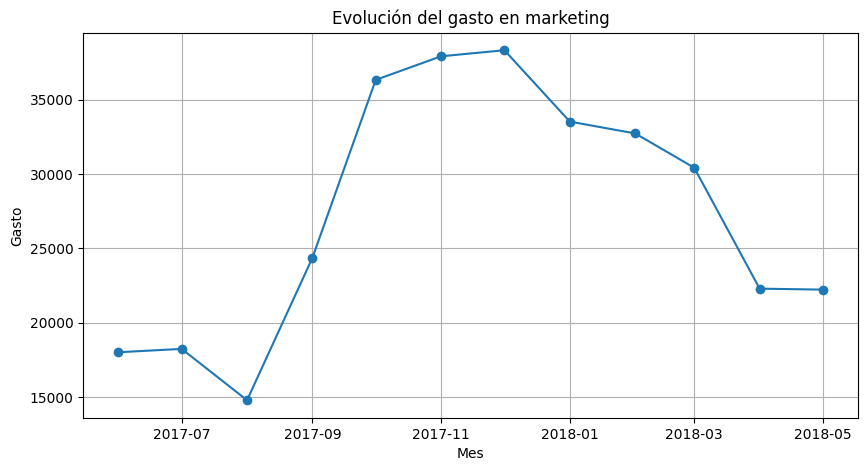

In [17]:
# Asegúrarse de que las fechas estén en datetime
costs['dt'] = pd.to_datetime(costs['dt'])

# 1.1 Gasto total
total_cost = costs['costs'].sum()
print("Gasto total en marketing:", total_cost)

# 1.2 Gasto por fuente
cost_by_source = costs.groupby('source_id')['costs'].sum().reset_index().sort_values('costs', ascending=False)
print("Gasto por fuente:\n", cost_by_source)

# 1.3 Gasto a lo largo del tiempo (mensual)
costs['month'] = costs['dt'].dt.to_period('M').dt.to_timestamp()
cost_by_month = costs.groupby('month')['costs'].sum().reset_index()

# Gráfico de evolución del gasto
plt.figure(figsize=(10,5))
plt.plot(cost_by_month['month'], cost_by_month['costs'], marker='o')
plt.title("Evolución del gasto en marketing")
plt.xlabel("Mes")
plt.ylabel("Gasto")
plt.grid(True)
plt.show()

#### ¿Cuál fue el costo de adquisición de clientes (CAC) de cada una de las fuentes?


In [18]:
# Obtener la fuente de adquisición de cada usuario (primera visita)
first_source = visits.sort_values('Start Ts').groupby('Uid')['Source Id'].first().reset_index()
first_source = first_source.rename(columns={'Source Id':'acquisition_source'})

# Usuarios que realizaron compras
buyers = orders.groupby('Uid')['Revenue'].sum().reset_index()
buyers['is_buyer'] = True

# Unir fuentes con compradores
buyers_with_source = buyers.merge(first_source, on='Uid', how='left')

# Calcular compradores por fuente
buyers_per_source = buyers_with_source.groupby('acquisition_source')['Uid'].nunique().reset_index().rename(columns={'Uid':'n_buyers'})

# Gasto por fuente
cost_by_source = costs.groupby('source_id')['costs'].sum().reset_index()

# Unir gasto y compradores
cac_df = buyers_per_source.merge(cost_by_source, left_on='acquisition_source', right_on='source_id', how='left')

# Calcular CAC
cac_df['CAC'] = cac_df['costs'] / cac_df['n_buyers']
print(cac_df[['acquisition_source', 'n_buyers', 'costs', 'CAC']])

   acquisition_source  n_buyers      costs        CAC
0                   1      2899   20833.27   7.186364
1                   2      3506   42806.04  12.209367
2                   3     10473  141321.63  13.493901
3                   4     10296   61073.60   5.931779
4                   5      6931   51757.10   7.467479
5                   7         1        NaN        NaN
6                   9      1088    5517.49   5.071222
7                  10      1329    5822.49   4.381106


#### ¿Cuán rentables eran las inversiones? (ROMI)
* ROMI > 0 → inversión rentable.

* ROMI < 0 → pérdida.

* Se puede expresar en % → multiplicando por 100.

Columnas disponibles: ['Buy Ts', 'Revenue', 'Uid', 'order_date', 'order_week', 'order_month', 'acquisition_source_x', 'acquisition_source_y']
Columna detectada como fuente de adquisición: acquisition_source_x
   acquisition_source_x   Revenue      costs     ROMI_%
0                     1  31090.55   20833.27  49.235094
1                     2  46923.61   42806.04   9.619133
2                     3  54511.24  141321.63 -61.427532
3                     4  56696.83   61073.60  -7.166386
4                     5  52624.02   51757.10   1.674978
5                     7      1.22        NaN        NaN
6                     9   5759.40    5517.49   4.384421
7                    10   4450.33    5822.49 -23.566550


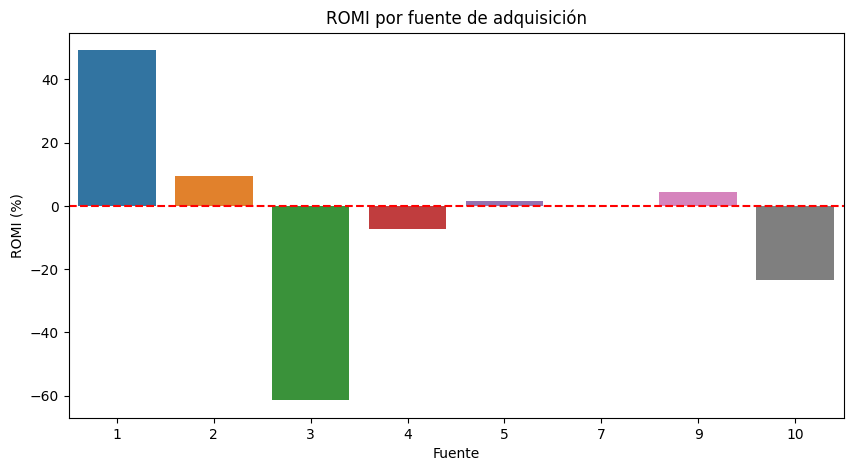

In [19]:

# === Librerías necesarias ===
import matplotlib.pyplot as plt
import seaborn as sns

# === Calcular ROMI por fuente de adquisición ===

# 1. Hacer el merge de pedidos con la fuente de adquisición
orders_with_source = orders.merge(first_source, on='Uid', how='left')

# 2. Detectar automáticamente la columna que representa la fuente
print("Columnas disponibles:", orders_with_source.columns.tolist())
source_col = [col for col in orders_with_source.columns if 'source' in col.lower()][0]
print("Columna detectada como fuente de adquisición:", source_col)

# 3. Calcular ingresos por fuente
revenue_by_source = (
    orders_with_source.groupby(source_col)['Revenue']
    .sum()
    .reset_index()
)

# 4. Unir ingresos y costos
romi_df = revenue_by_source.merge(
    cost_by_source, 
    left_on=source_col, 
    right_on='source_id', 
    how='left'
)

# 5. Calcular ROMI
romi_df['ROMI'] = (romi_df['Revenue'] - romi_df['costs']) / romi_df['costs']
romi_df['ROMI_%'] = romi_df['ROMI'] * 100

# 6. Mostrar tabla final
print(romi_df[[source_col, 'Revenue', 'costs', 'ROMI_%']])

# 7. Graficar ROMI por fuente
plt.figure(figsize=(10,5))
sns.barplot(data=romi_df, x=source_col, y='ROMI_%')
plt.axhline(0, color='red', linestyle='--')
plt.title("ROMI por fuente de adquisición")
plt.xlabel("Fuente")
plt.ylabel("ROMI (%)")
plt.show()

#### 🔹 3. Marketing (Gastos, CAC y ROMI)


1. **Gasto total**

- La empresa invirtió 329,131.62 en marketing durante el período analizado.

- El gasto no fue uniforme: tuvo un pico entre octubre y diciembre de 2017 (~37,000 mensuales) y luego disminuyó de manera constante en 2018 hasta llegar a ~22,000.

- Esto indica campañas más agresivas a finales de 2017 (posiblemente Black Friday, Navidad o fin de año).

2. **Distribución por fuente**

- La fuente 3 fue la que más recursos recibió (141,321.63 → alreadedor del 41% del gasto total).

- Le siguen: fuente 4 (61,073.60) y fuente 5 (51,757.10).

- Las fuentes 9 y 10 recibieron muy poco presupuesto (<6,000 cada una).

 La empresa concentró casi todo el presupuesto en 3 canales principales (3, 4 y 5).

4. **Costo de adquisición de clientes (CAC)**

- El CAC promedio varió mucho entre fuentes:

Fuente 1: 7.18

Fuente 2: 12.21 (uno de los más altos, menos eficiente)

Fuente 3: 13.49 (el más caro en términos de adquisición)

Fuente 4: 5.93 (eficiente)

Fuente 5: 7.46

Fuente 9: 5.07

Fuente 10: 4.38 (la más barata y eficiente en adquisición).

* La fuente 10 fue la más eficiente (CAC bajo) aunque recibió poco presupuesto.
* La fuente 3, a pesar de ser la más costosa y recibir la mayor inversión, tuvo el CAC más alto (13.49) → poca eficiencia.

5. ¿Cuán rentables eran las inversiones? (ROMI)

**Fuentes Rentables**

- Fuente 1: Tiene el ROMI más alto (~49%), es decir, por cada dolar invertido se generan retornos positivos significativos.

- Fuente 2 y Fuente 9: También presentan ROMI positivo, aunque más bajo (~9% y ~4% respectivamente). Son rentables, pero con menor margen.

**Fuentes con pérdidas**

Fuente 3: Es la menos rentable, con un ROMI de alrededor de -61%, lo que significa que la inversión supera con creces a los ingresos.

Fuente 10: Tiene pérdidas importantes (-24%).

Fuentes 4: Presentan ROMI negativo leve, pero no tan crítico como la fuente 3.


- **Recomendaciones:**

Potenciar y priorizar la inversión en la Fuente 1 (máxima rentabilidad).

Mantener moderadamente las fuentes 2 y 9, dado que son positivas pero con margen bajo.

Revisar y optimizar las fuentes 3 y 10, ya que generan fuertes pérdidas; considerar reducir inversión o cambiar estrategia en esas fuentes.

Monitorear las fuentes con ROMI cercano a cero (4, 5), ya que tienen poco margen y pueden volverse rentables o seguir en pérdida según ajustes.




## Conclusión Global y Recomendaciones de Inversión

#### 1. En qué fuentes invertir más

* **Fuente 1 → Prioritaria**

Métricas: mejor conversión (0, 7 y 30 días), AOV alto (~$6), ROMI más alto (+49%).

Justificación: genera clientes que compran rápido, gastan más y entregan la mejor rentabilidad.

Recomendación: aumentar inversión significativamente aquí.

* **Fuente 2 → Inversión moderada-alta**

Métricas: buena conversión, AOV más alto (~$7.3), ROMI positivo (+9%).

Justificación: aunque CAC es alto (12.21), compensa con ticket promedio elevado y retención aceptable.

Recomendación: mantener o aumentar con foco en optimización de costos.

* **Fuente 9 → Inversión moderada**

Métricas: CAC bajo (5.07), ROMI positivo (+4%).

Justificación: rentable, aunque con volumen limitado.

Recomendación: mantener inversión y explorar escalabilidad.


#### 2. Fuentes a reducir o replantear

* **Fuente 3 → Reducir fuertemente**

Métricas: recibe 41% del presupuesto, pero CAC más alto (13.49) y ROMI negativo (-61%).

Justificación: alto gasto sin retorno → absorbe recursos que podrían rendir más en otras fuentes.

* **Fuente 10 → Replantear estrategia**

Métricas: CAC bajo (4.38, eficiente), pero ROMI negativo (-24%).

Justificación: el problema no está en adquisición sino en monetización/retención de estos usuarios.

Recomendación: mantener inversión mínima, probar cambios en onboarding y fidelización.

* **Fuentes 4 y 5 → Monitorear**

Métricas: CAC medio (5.9–7.4), ROMI cercano a cero.

Justificación: alto volumen, pero margen limitado.

Recomendación: mantener bajo control, optimizar campañas y analizar ajustes antes de cortar.

#### 3. Enfoque estratégico

1. Activación temprana: invertir en campañas de bienvenida, descuentos y bundles en los primeros 7 días, cuando la conversión es más alta.

2. Fidelización: dado que la retención es baja (<10% después de un mes), el marketing debe enfocarse en recompra: notificaciones, programas de puntos, beneficios para clientes recurrentes.

3. Incrementar ticket promedio (AOV): fomentar compras mínimas con promos, upselling/cross-selling, ya que la mediana es baja ($2.5).

4. Optimización de gasto: redirigir parte del presupuesto de la fuente 3 hacia fuentes 1, 2 y 9, que han demostrado ser más rentables.